# Johnson's S<sub>U</sub>-distribution

$\xi$ (xi) -> loc

$\gamma$ (gamma) -> a

$\delta$ (delta) -> b > 0

$\lambda$ (lambda) -> scale > 0

MEAN
$$\xi -\lambda e^{\dfrac {\delta ^{-2}}{2}}\sinh \left({\dfrac {\gamma }{\delta }}\right)$$
VARIANCE
$$\dfrac {\lambda ^{2}}{2}\left( e^{\delta ^{-2}}-1\right) \left( e^{\delta ^{-2}}\cosh \left( \dfrac {2\gamma }{\delta }\right) +1\right)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

#теоретические: мат.ожидание, дисперсия
def jhnsudstr_mean(xi,gamma,delta,lambda_):
    return (xi 
            - lambda_ * np.exp(delta**(-2)/2) 
            * np.sinh(gamma/delta))
def jhnsudstr_variance(xi,gamma,delta,lambda_):
    return (lambda_**2/2 * 
            (np.exp(delta**(-2)) -1) *
            (np.exp(delta**(-2)) * np.cosh(2*gamma/delta) +1))

## Инициализируем параметры и объект распределения, выберем наиболее показательный отрезок значений X=[-4..10], взглянем на теоретические PDF(x), CDF(x)

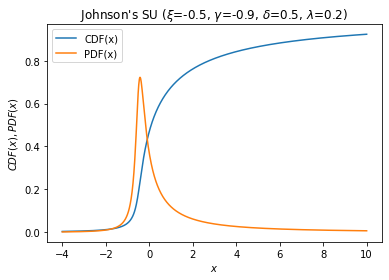

In [2]:
xi_loc = -0.5
gamma_a = -0.9
delta_b = 0.5 # >0
lambda_scale = 0.2 # >0

johnsonsu_rv = sts.johnsonsu(gamma_a, delta_b, xi_loc, lambda_scale)

x = np.linspace(-4,10,1000) #используется для теор.PDF,CDF и нормального распределения

cdf_theoretical = johnsonsu_rv.cdf(x)
pdf_theoretical = johnsonsu_rv.pdf(x)

plt.plot(x, cdf_theoretical, label='CDF(x)')
plt.plot(x, pdf_theoretical, label='PDF(x)')
plt.ylabel('$CDF(x), PDF(x)$')
plt.xlabel('$x$')
plt.title('Johnson\'s SU ($\\xi$=%s, $\gamma$=%s, $\delta$=%s, $\lambda$=%s)' % (xi_loc,gamma_a,delta_b,lambda_scale))
plt.legend()
plt.show()

## Выборка объёма 1000, гистограмма выборки, теоретическая плотность распределения

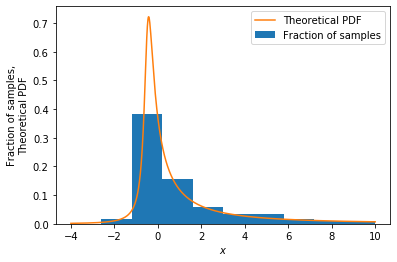

In [3]:
sample = johnsonsu_rv.rvs(size=1000)

plt.hist(sample, range=(-4,10), density=True, label='Fraction of samples')
plt.plot(x, pdf_theoretical, label='Theoretical PDF')
plt.ylabel('Fraction of samples,\nTheoretical PDF')
plt.xlabel('$x$')
plt.legend()
plt.show()

##  Теоретические мат.ожидание и дисперсия

In [4]:
#математическое ожидение
j_mean = jhnsudstr_mean(xi_loc, gamma_a, delta_b, lambda_scale)
#дисперсия
j_var = jhnsudstr_variance(xi_loc, gamma_a, delta_b, lambda_scale)
print('Теоретические:\nМат.ожидание= %s\nДисперсия= %s' % (j_mean, j_var))

Теоретические:
Мат.ожидание= 3.8479781735140666
Дисперсия= 1072.8675872543708


In [5]:
#количество итераций для семплирования выборочных средних при разных n
sampling_times = 1000
#далее по коду:
#sample_means - вектор выборочных средних
#norm_approx - нормальное распределение для аппроксимации распределения выборочных средних


## n=1

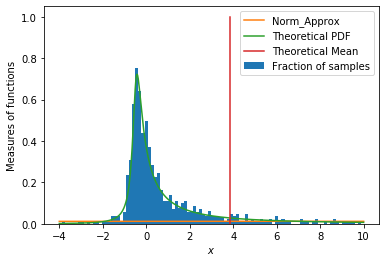

In [6]:
n = 1

sample_means = [np.average(johnsonsu_rv.rvs(size=n)) for i in range(sampling_times)]
norm_approx = sts.norm(j_mean, np.sqrt( j_var/n))

plt.hist(sample_means, range=(-4,10), bins=100, density=True, label='Fraction of samples')
plt.plot(x, norm_approx.pdf(x), label='Norm_Approx')
plt.plot(x, pdf_theoretical, label='Theoretical PDF')
plt.plot([j_mean,j_mean],[0.,1.], label='Theoretical Mean')
plt.ylabel('Measures of functions')
plt.xlabel('$x$')
plt.legend()
plt.show()

## n=5

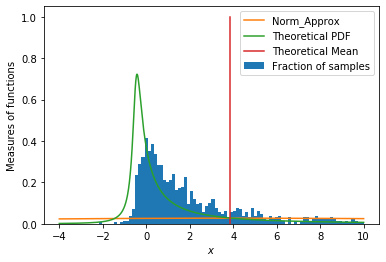

In [7]:
n = 5

sample_means = [np.average(johnsonsu_rv.rvs(size=n)) for i in range(sampling_times)]
norm_approx = sts.norm(j_mean, np.sqrt( j_var/n))

plt.hist(sample_means, range=(-4,10), bins=100, density=True, label='Fraction of samples')
plt.plot(x, norm_approx.pdf(x), label='Norm_Approx')
plt.plot(x, pdf_theoretical, label='Theoretical PDF')
plt.plot([j_mean,j_mean],[0.,1.], label='Theoretical Mean')
plt.ylabel('Measures of functions')
plt.xlabel('$x$')
plt.legend()
plt.show()

## n=25

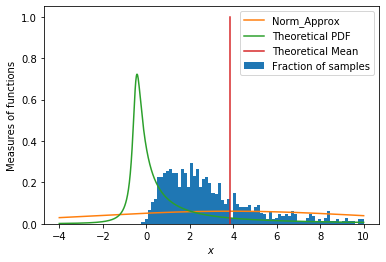

In [8]:
n = 25

sample_means = [np.average(johnsonsu_rv.rvs(size=n)) for i in range(sampling_times)]
norm_approx = sts.norm(j_mean, np.sqrt( j_var/n))

plt.hist(sample_means, range=(-4,10), bins=100, density=True, label='Fraction of samples')
plt.plot(x, norm_approx.pdf(x), label='Norm_Approx')
plt.plot(x, pdf_theoretical, label='Theoretical PDF')
plt.plot([j_mean,j_mean],[0.,1.], label='Theoretical Mean')
plt.ylabel('Measures of functions')
plt.xlabel('$x$')
plt.legend()
plt.show()

## n=125

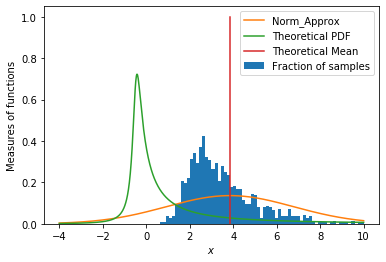

In [9]:
n = 125

sample_means = [np.average(johnsonsu_rv.rvs(size=n)) for i in range(sampling_times)]
norm_approx = sts.norm(j_mean, np.sqrt( j_var/n))

plt.hist(sample_means, range=(-4,10), bins=100, density=True, label='Fraction of samples')
plt.plot(x, norm_approx.pdf(x), label='Norm_Approx')
plt.plot(x, pdf_theoretical, label='Theoretical PDF')
plt.plot([j_mean,j_mean],[0.,1.], label='Theoretical Mean')
plt.ylabel('Measures of functions')
plt.xlabel('$x$')
plt.legend()
plt.show()

## n = 625

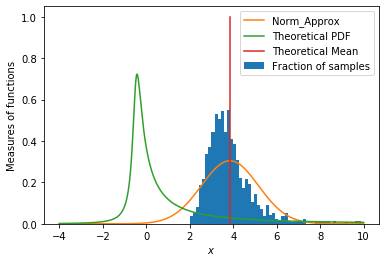

In [10]:
n = 625

sample_means = [np.average(johnsonsu_rv.rvs(size=n)) for i in range(sampling_times)]
norm_approx = sts.norm(j_mean, np.sqrt( j_var/n))

plt.hist(sample_means, range=(-4,10), bins=100, density=True, label='Fraction of samples')
plt.plot(x, norm_approx.pdf(x), label='Norm_Approx')
plt.plot(x, pdf_theoretical, label='Theoretical PDF')
plt.plot([j_mean,j_mean],[0.,1.], label='Theoretical Mean')
plt.ylabel('Measures of functions')
plt.xlabel('$x$')
plt.legend()
plt.show()

## n = 3125

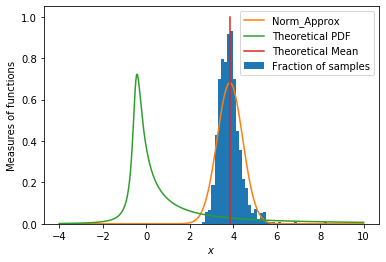

In [11]:
n = 3125

sample_means = [np.average(johnsonsu_rv.rvs(size=n)) for i in range(sampling_times)]
norm_approx = sts.norm(j_mean, np.sqrt( j_var/n))

plt.hist(sample_means, range=(-4,10), bins=100, density=True, label='Fraction of samples')
plt.plot(x, norm_approx.pdf(x), label='Norm_Approx')
plt.plot(x, pdf_theoretical, label='Theoretical PDF')
plt.plot([j_mean,j_mean],[0.,1.], label='Theoretical Mean')
plt.ylabel('Measures of functions')
plt.xlabel('$x$')
plt.legend()
plt.show()

### Выводы, наблюдения..
Выбранное распределение несимметрично относительно моды плотности, а потому неплохо подходит для проверки ПЦТ.

При малом n : гистограмма распределения средних по выборке стремится описать теоретическую плотность исходной функции распределения. Математически, это вполне логично: при n=1 на каждую итерацию повтора (например из 1000) мы получаем всего одно значение, ничем не усредненное, т.е. из всех повторов получаем плотность распределения исходной функции.

При росте n : гистограмма смещается и концентрируется у теоретического среднего(мат.ожидания) исходной функции плотности распределения, точночть аппроксимации распределения выборочных средних нормальным распределением растет.